# EDA CEP

In [1]:
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt
import chardet

In [2]:
# File locations (relative to notebook root)
RAW_DATA = Path("..") / "data" / "raw" / "cep_base_consolidada_2010_ahora.csv"
RAW_DICT = Path("..") / "data" / "raw" / "cep_diccionario_de_variables_base_consolidada.csv"
PERSONS_JSONL = Path("..") / "data" / "cleaned" / "cep_persons.jsonl"

# Reproducibility
SEED = 42
random.seed(SEED)

In [3]:
# detect character encoding
with RAW_DICT.open("rb") as fh:
    enc_sample = fh.read(100_000)
DICT_ENCODING = chardet.detect(enc_sample)["encoding"]

In [4]:
df_raw = pd.read_csv(RAW_DATA, low_memory=False, encoding="utf-8")
df_dict = pd.read_csv(RAW_DICT, low_memory=False, encoding=DICT_ENCODING)

In [5]:
df_raw

,aleatorio_deck,aleatorio_deck_1,aleatorio_deck_2,aleatorio_deck_3,aleatorio_deck_4,anomia_1_a,anomia_1_b,anomia_1_c,anomia_1_d,anomia_1_e,...,vivienda_6_b,vivienda_6_c,vivienda_6_d,vivienda_6_e,vivienda_6_f,vivienda_6_g,vivienda_7,vivienda_8,vivienda_9,zona_u_r
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
39936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
39937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
39938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
df_dict

,variable,pregunta,alternativa,etiqueta
0,id_bu,ID �nico base consolidada,NaN,NaN
1,id_bu_encuesta,ID �nico por encuesta,NaN,NaN
2,encuesta,N�mero encuesta,NaN,NaN
3,encuesta_a,A�o encuesta,NaN,NaN
4,encuesta_m,Mes terreno encuesta,NaN,NaN
...,...,...,...,...
30686,vivienda_9,"Pensando en su caso particular, �dir�a Ud. que...",1.0,"Si, han disminuido"
30687,vivienda_9,"Pensando en su caso particular, �dir�a Ud. que...",2.0,No han cambiado / han aumentado
30688,vivienda_9,"Pensando en su caso particular, �dir�a Ud. que...",-8.0,No sabe
30689,zona_u_r,Zona Urbano/Rural,1.0,Urbano


In [7]:
# how many valid values?
df_raw.iloc[0].dropna()

corrupcion_23     2.0
corrupcion_25     2.0
edad             80.0
elec_part_4       1.0
encuesta         62.0
                 ... 
terremoto_3_d     1.0
terremoto_3_e     1.0
terremoto_3_f     2.0
terremoto_3_g     2.0
zona_u_r          1.0
Name: 0, Length: 190, dtype: object

In [8]:
def aux_plot_bar(series, code_labels):
    series = series.value_counts().sort_index()
    series.index = series.index.astype(int).astype(str).map(code_labels)
    return series.plot(kind='bar')

# Encuesta CEP

- I'm using the 2010-Today CEP database.
- It starts at N°62 from June/July 2010

In [34]:
df_raw['religion_14']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39935    2.0
39936    1.0
39937    2.0
39938    2.0
39939    NaN
Name: religion_14, Length: 39940, dtype: float64

## Sexo

In [9]:
df_raw['sexo'].value_counts()

sexo
2.0    24238
1.0    15701
Name: count, dtype: int64

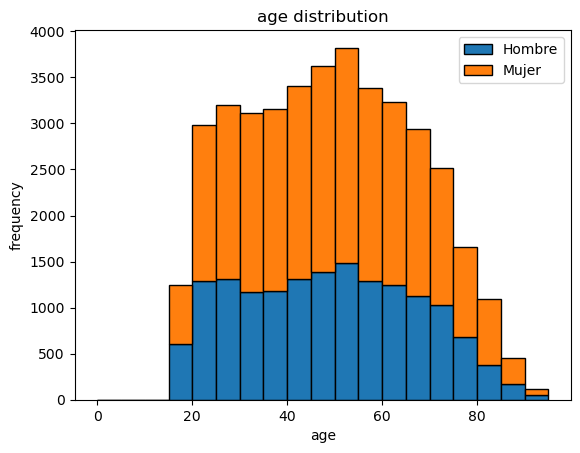

In [10]:
df = df_raw[['edad','sexo']].dropna()
mask = df['sexo'] == 1

plt.hist([df[mask]['edad'], df[~mask]['edad']], bins=range(0, 100, 5), edgecolor='black', stacked=True, label=['Hombre', 'Mujer'])
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()

## Pobreza

| Código | pobreza_17 (incluye trabajadora) | pobreza_17_a (excluye trabajadora) | pobreza_17_b (incluye trabajadora) |
|:------:|:--------------------------------:|:-----------------------------------:|:-----------------------------------:|
| **-9** | no contesta                      | no contesta                         | no contesta                         |
| **-8** | no sabe                          | no sabe                             | no sabe                             |
| **1**  | clase baja                       | clase baja                          | clase baja                          |
| **2**  | clase **trabajadora**            | clase media baja                    | clase **trabajadora**               |
| **3**  | clase media baja                 | clase media                         | clase media baja                    |
| **4**  | clase media                      | clase media alta                    | clase media                         |
| **5**  | clase media alta                 | clase alta                          | clase media alta                    |
| **6**  | clase alta                       | *(sin este código)*                 | clase alta                          |
| **7**  | ninguna de esas                  | *(sin este código)*                 | *(sin este código)*                 |


In [11]:
# pob17, pob17a, pob17b = df_raw[['pobreza_17', 'pobreza_17_a', 'pobreza_17_b']].dropna(axis=0, how='all')
pob17 = df_raw[['encuesta_a','pobreza_17']].dropna(axis=0, how='any')
pob17a = df_raw[['encuesta_a','pobreza_17_a']].dropna(axis=0, how='any')
pob17b = df_raw[['encuesta_a','pobreza_17_b']].dropna(axis=0, how='any')

In [12]:
pob17.value_counts()

Series([], Name: count, dtype: int64)

In [13]:
pob17a.value_counts(),pob17a.value_counts().sum()

(encuesta_a  pobreza_17_a
 2019.0       2.0            534
              3.0            482
              1.0            396
              4.0             50
             -9.0             12
             -8.0             11
              5.0             11
 Name: count, dtype: int64,
 np.int64(1496))

In [14]:
pob17a['encuesta_a'].value_counts()

encuesta_a
2019.0    1496
Name: count, dtype: int64

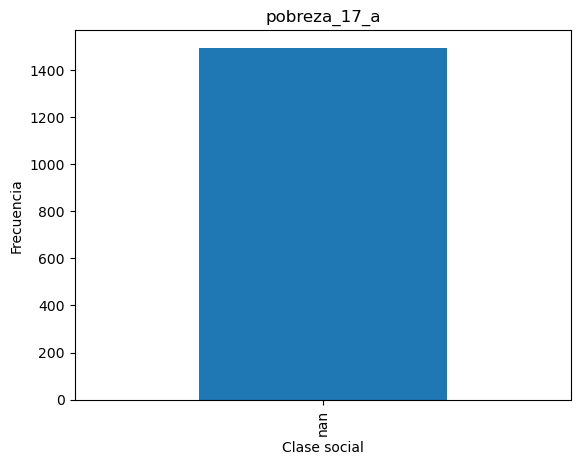

In [15]:
code_labels = {
    '1': 'clase baja',
    '2': 'clase media baja',
    '3': 'clase media',
    '4': 'clase media alta',
    '5': 'clase alta',
    '-8': 'no sabe',
    '-9': 'no contesta'
}

vc_a = pob17a['encuesta_a'].value_counts()
vc_a.index = vc_a.index.map(code_labels)
vc_a.plot(kind='bar', title='pobreza_17_a')
plt.xlabel('Clase social')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
pob17b.value_counts(),pob17b.value_counts().sum()

(encuesta_a  pobreza_17_b
 2019.0       2.0            536
              4.0            288
              3.0            259
              1.0            241
              5.0             33
             -8.0             14
              6.0              5
             -9.0              4
 Name: count, dtype: int64,
 np.int64(1380))

In [17]:
pob17b['encuesta_a'].value_counts()

encuesta_a
2019.0    1380
Name: count, dtype: int64

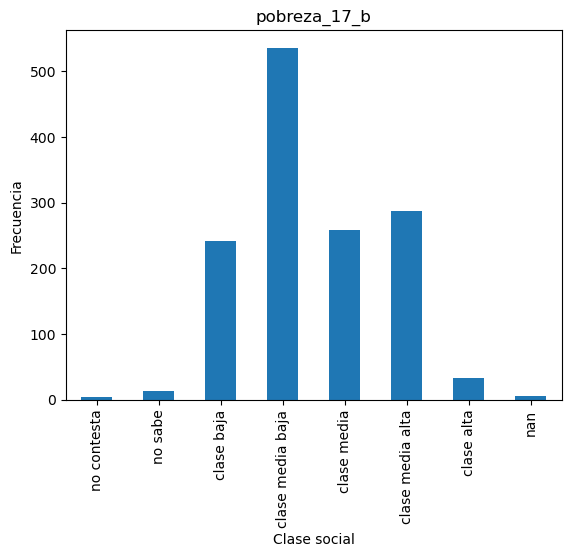

In [18]:
def new_func():
    vc_b = pob17b['pobreza_17_b'].value_counts().sort_index()
    vc_b.index = vc_b.index.astype(int).astype(str).map(code_labels)
    vc_b.plot(kind='bar', title='pobreza_17_b')
    plt.xlabel('Clase social')
    plt.ylabel('Frecuencia')
    plt.show()

new_func()


## GSE

- 1: ABC1
- 2: C2
- 3: C3
- 4: D
- 5: E

In [19]:
gse = df_raw['gse']
gse.value_counts()

gse
3.0    17924
4.0    15142
2.0     4575
1.0     1492
5.0      806
Name: count, dtype: int64

In [20]:
# rows with invalid gse values
df_raw[gse.isna()].dropna(axis=1)

,bienestar_13_c,bienestar_13_f,bienestar_13_g,bienestar_13_h,ciudadania_16,ciudadania_31,ciudadania_33_a,ciudadania_33_b,ciudadania_33_c,ciudadania_33_d,...,confianza_6_j,confianza_6_k,confianza_6_m,confianza_6_n,confianza_6_o,confianza_6_p,confianza_6_r,confianza_6_s,confianza_6_x,democracia_21
39939,8.0,-9.0,10.0,10.0,5.0,5.0,4.0,5.0,1.0,2.0,...,4.0,4.0,3.0,1.0,1.0,4.0,3.0,4.0,1.0,3.0


## Educación


esc_nivel_1: En encuestas 36, 37, 39, 40, 43, 44, 46, 49, 52, 55, 56, 57.
- 0: No estudio
- 1: Ed Básica Incompleta
- 2: Ed Básica Completa
- 3: Ed Media Incompleta
- 4: Ed Media Completa
- 5: Ed Superior Universitaria Incompleta
- 6: Ed Superior Universitaria Completa
- 7: Ed Superior No Universitaria Incompleta
- 8: Es Superior No Universitaria Completa
- -8: No sabe
- -9: No contesta

esc_nivel_1_b: En encuestas 58-84. Se agrega:
- 9: Post grado, magíster, doctorado

esc_nivel_1_c: En encuestas 85-59.
- 9: Post grado incompleto
- 10: Post grado completo

In [21]:
df_raw['esc_nivel_1_c'].value_counts()

esc_nivel_1_c
 4.0     1948
 3.0      803
 2.0      720
 1.0      716
 8.0      698
 6.0      648
 7.0      368
 5.0      315
 10.0      65
 9.0       59
 0.0       50
-9.0       21
-8.0        2
Name: count, dtype: int64

<Axes: xlabel='esc_nivel_1_b'>

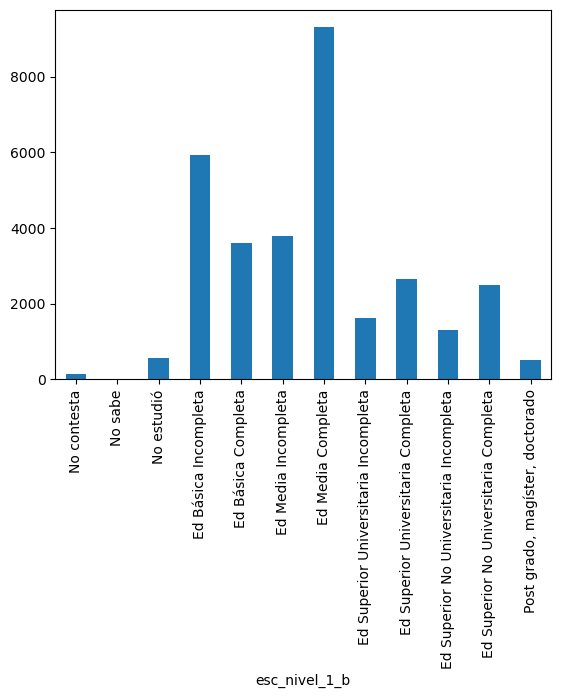

In [22]:
code_labels_1_b = {
    '0':  'No estudió',
    '1':  'Ed Básica Incompleta',
    '2':  'Ed Básica Completa',
    '3':  'Ed Media Incompleta',
    '4':  'Ed Media Completa',
    '5':  'Ed Superior Universitaria Incompleta',
    '6':  'Ed Superior Universitaria Completa',
    '7':  'Ed Superior No Universitaria Incompleta',
    '8':  'Ed Superior No Universitaria Completa',
    '9':  'Post grado, magíster, doctorado',
    '-8': 'No sabe',
    '-9': 'No contesta'
}

aux_plot_bar(df_raw['esc_nivel_1_b'], code_labels_1_b)

<Axes: xlabel='esc_nivel_1_c'>

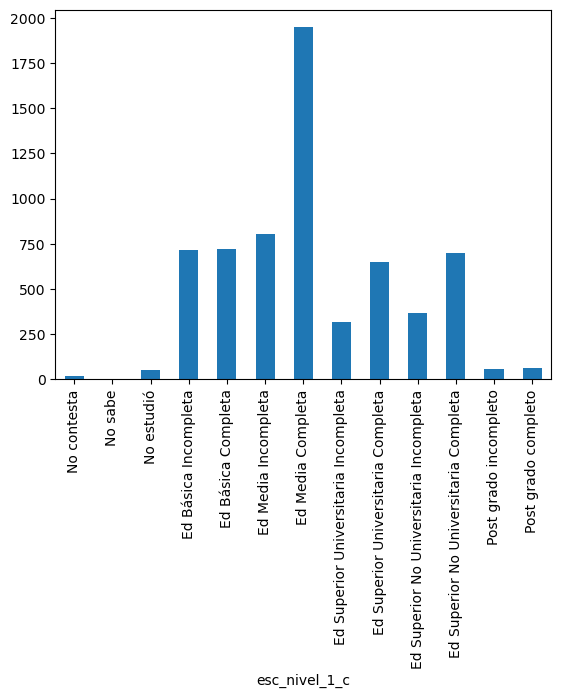

In [23]:
code_labels_1_c = {
    '0':  'No estudió',
    '1':  'Ed Básica Incompleta',
    '2':  'Ed Básica Completa',
    '3':  'Ed Media Incompleta',
    '4':  'Ed Media Completa',
    '5':  'Ed Superior Universitaria Incompleta',
    '6':  'Ed Superior Universitaria Completa',
    '7':  'Ed Superior No Universitaria Incompleta',
    '8':  'Ed Superior No Universitaria Completa',
    '9':  'Post grado incompleto',
    '10': 'Post grado completo',
    '-8': 'No sabe',
    '-9': 'No contesta'
}

aux_plot_bar(df_raw['esc_nivel_1_c'], code_labels_1_c)

In [24]:
# are there any esc_nivel_1 values?
df_raw[~df_raw['esc_nivel_1'].isna()]

,aleatorio_deck,aleatorio_deck_1,aleatorio_deck_2,aleatorio_deck_3,aleatorio_deck_4,anomia_1_a,anomia_1_b,anomia_1_c,anomia_1_d,anomia_1_e,...,vivienda_6_b,vivienda_6_c,vivienda_6_d,vivienda_6_e,vivienda_6_f,vivienda_6_g,vivienda_7,vivienda_8,vivienda_9,zona_u_r


## Identidad política


iden_pol_1: Como Ud. sabe, tradicionalmente en nuestro país la gente define las posiciones políticas como más cercanas a la izquierda, al centro o a la derecha. Tenemos representadas en esta tarjeta las distintas posiciones políticas. Por favor, indíqueme, ¿con cuál se identifica más o con cuál posición simpatiza Ud. más?
- 1    Derecha
- 2    Centro derecha
- 3    Centro
- 4    Centro izquierda
- 5    Izquierda
- 6    Independiente
- 7    Ninguna
- -8   No sabe
- -9   No contesta


In [25]:
df_raw['iden_pol_1'].value_counts()

iden_pol_1
 7.0    15145
 3.0     2906
 5.0     2711
 1.0     2466
 4.0     2348
 2.0     1369
 6.0     1020
-8.0      691
-9.0      615
Name: count, dtype: int64

<Axes: xlabel='iden_pol_1'>

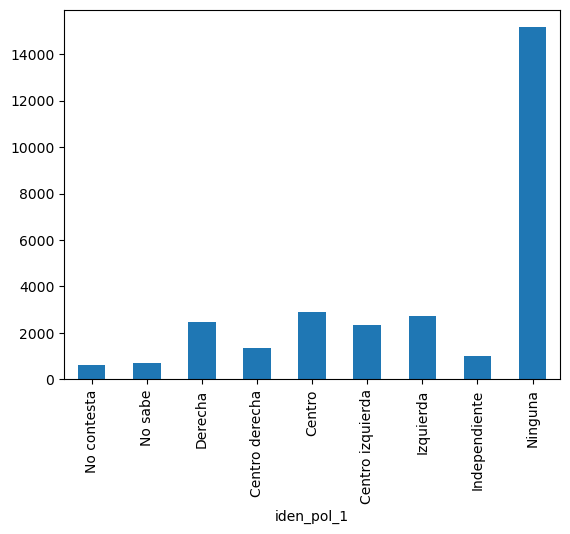

In [26]:
code_labels_iden_pol_1 = {
    '1':  'Derecha',
    '2':  'Centro derecha',
    '3':  'Centro',
    '4':  'Centro izquierda',
    '5':  'Izquierda',
    '6':  'Independiente',
    '7':  'Ninguna',
    '-8': 'No sabe',
    '-9': 'No contesta'
}

aux_plot_bar(df_raw['iden_pol_1'], code_labels_iden_pol_1)

## Región

region_2   Region desde Encuesta 62 hasta 81
- 1    Región de Tarapaca
- 2    Región de Antofagasta
- 3    Región de Atacama
- 4    Región de Coquimbo
- 5    Región de Valparaíso
- 6    Región del Libertador General Bernardo O'Higgins
- 7    Región del Maule
- 8    Región del Bio-bío
- 9    Región de la Araucanía
- 10   Región de los Lagos
- 11   Región de Aysén del General Carlos Ibáñez del Campo
- 12   Región de Magallanes y de la Antártica Chilena
- 13   Región Metropolitana
- 14   Los Ríos
- 15   Arica y Parinacota


region_3   Region desde Encuesta 82 hasta 89
- 1    Región de Tarapaca
- 2    Región de Antofagasta
- 3    Región de Atacama
- 4    Región de Coquimbo
- 5    Región de Valparaíso
- 6    Región del Libertador General Bernardo O'Higgins
- 7    Región del Maule
- 8    Región del Bio-bío
- 9    Región de la Araucanía
- 10   Región de los Lagos
- 11   Región de Aysén del General Carlos Ibáñez del Campo
- 12   Región de Magallanes y de la Antártica Chilena
- 13   Región Metropolitana
- 14   Los Ríos
- 15   Arica y Parinacota
- 16   Región de Ñuble

In [27]:
df_raw['region_2'].value_counts()

region_2
13.0    10226
8.0      3684
5.0      2924
9.0      1808
7.0      1769
6.0      1549
10.0     1403
4.0      1172
2.0      1083
14.0      718
1.0       401
15.0      378
3.0       376
12.0      299
11.0      103
Name: count, dtype: int64

In [28]:
df_raw['region_3'].value_counts()

region_3
13.0    5148
5.0     1232
8.0     1006
7.0      704
9.0      669
6.0      567
4.0      519
10.0     503
2.0      354
16.0     336
14.0     311
1.0      216
3.0      180
15.0     129
12.0     108
11.0      64
Name: count, dtype: int64

## Religión

religion_1   ¿Podría Ud. decirme la religión o iglesia a la que pertenece o se siente más cercano? [8 categorías]
- 1    Catolica
- 2    Evangelica
- 3    Testigo de jehova
- 4    Judia
- 5    Mormona
- 6    Musulmana
- 7    Ortodoxa
- 8    Otra religion o credo
- 9    Ninguna
- 10   Ateo
- 11   Agnostico
- 13   Otras iglesias y religiones cristianas # -> ya no se usa
- -8   No sabe
- -9   No contesta


In [29]:
df_raw['religion_1'].value_counts()

religion_1
 1.0     20426
 2.0      5692
 9.0      5233
-9.0       535
 8.0       509
 3.0       319
 11.0      290
 10.0      256
 5.0       232
-8.0        72
 4.0        24
 7.0        16
 6.0        10
Name: count, dtype: int64

## Vivienda

zona_u_r: Zona Urbano/Rural
- 1   Urbano
- 2   Rural



In [30]:
df_raw['zona_u_r'].value_counts()

zona_u_r
1.0    33839
2.0     6100
Name: count, dtype: int64

# Base limpia

In [31]:
variables_of_interest = {
    # CUÁNDO ENCUESTA
    'a': ['encuesta_a'], # Año
    'm': ['encuesta_m'], # Mes
    # SEXO
    'sexo': ['sexo'], # 1 -> Hombre, 2 -> Mujer
    # EDAD
    'edad': ['edad'], # Edad en años
    # NIVEL SOCIOECONÓMICO
    'pobreza': [
        'pobreza_17_a',
        'pobreza_17_b',
        ],
    # NIVEL EDUCATIVO
    'esc_nivel': [
        'esc_nivel_1_b',
        'esc_nivel_1_c',
        ],
    # IDENTIDAD POLÍTICA
    'iden_pol': ['iden_pol_1'],
    # REGIÓN
    'region': [
        'region_2', # Region desde Encuesta 62 hasta 81
        'region_3', # Region desde Encuesta 82 hasta 89
        ], 
    # RELIGIÓN
    'religion': ['religion_1'],
    # ZONA URBANA/RURAL
    'zona_u_r': ['zona_u_r'],
}

In [32]:
# Agregar año y mes de la encuesta
# df_clean = df_raw[['encuesta_a', 'encuesta_m']].rename(
#     columns={
#         'encuesta_a': 'a',
#         'encuesta_m': 'm'
#     }

# Una forma de lidiar con variaciones entre preguntas
# for var, cols in variables_of_interest.items():
#     if len(cols) == 1:
#         df_clean[var] = df_raw[cols[0]]
#     else:
#         df_clean[var] = df_raw[cols].apply(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None, axis=1)

In [33]:
# TODO: Column types should be set explicitly
# TODO: Join with dictionary to get labels
# TODO: Maybe consider grouping some variables that were more granular in different surveys, like postgrado incompleto/completo
# TODO: Dump to JSONL

# Otra forma de lidiar con variaciones entre preguntas
flat_variables_of_interest = [v for vals in variables_of_interest.values() for v in vals]
df_clean = df_raw[flat_variables_of_interest].copy().dropna(how='all')

# Determine numeric and categoric columns
integer_cols = [
    'encuesta_a',
    'encuesta_m',
    'edad'
]
categoric_cols = [
    'sexo',
    'pobreza_17_a',
    'pobreza_17_b',
    'esc_nivel_1_b',
    'esc_nivel_1_c',
    'iden_pol_1',
    'region_2',
    'region_3',
    'religion_1',
    'zona_u_r'
]

for col in integer_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype('Int64') # Int64 allows for NaN values
for col in categoric_cols:
    df_clean[col] = pd.Categorical(df_clean[col], ordered=False)

df_clean

,encuesta_a,encuesta_m,sexo,edad,pobreza_17_a,pobreza_17_b,esc_nivel_1_b,esc_nivel_1_c,iden_pol_1,region_2,region_3,religion_1,zona_u_r
0,2010,7,2.0,80,NaN,NaN,1.0,NaN,2.0,15.0,NaN,1.0,1.0
1,2010,7,2.0,80,NaN,NaN,2.0,NaN,5.0,15.0,NaN,1.0,1.0
2,2010,7,2.0,20,NaN,NaN,4.0,NaN,1.0,15.0,NaN,9.0,1.0
3,2010,7,1.0,18,NaN,NaN,4.0,NaN,3.0,15.0,NaN,9.0,1.0
4,2010,7,2.0,74,NaN,NaN,6.0,NaN,7.0,15.0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39934,2024,6,1.0,28,NaN,NaN,NaN,4.0,NaN,NaN,13.0,NaN,1.0
39935,2024,6,1.0,28,NaN,NaN,NaN,4.0,NaN,NaN,13.0,NaN,1.0
39936,2024,6,1.0,18,NaN,NaN,NaN,4.0,NaN,NaN,9.0,NaN,1.0
39937,2024,6,2.0,42,NaN,NaN,NaN,4.0,NaN,NaN,9.0,NaN,2.0
